In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as ppr
from fitter import Fitter

In [60]:
%matplotlib inline

In [61]:
# Lectura de los datos
df_Continent = pd.read_csv('../data\Continent_Consumption_TWH.csv')
df_Country =  pd.read_csv('../data/Country_Consumption_TWH.csv')
df_non_renewable_total = pd.read_csv('../data/nonRenewablesTotalPowerGeneration.csv')
df_renewable_total = pd.read_csv('../data/renewablesTotalPowerGeneration.csv')
df_renewable_power_generation = pd.read_csv('../data/nonRenewablesTotalPowerGeneration.csv')
df_top_Countries = pd.read_csv('../data/top20CountriesPowerGeneration.csv')

In [62]:
df_Continent.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [63]:
continentes = list(set(df_Continent.columns) - set(['World','OECD','CIS','Middle-East','BRICS','Year']))
organization_name = ['OECD','CIS','Middle-East','BRICS']

In [64]:
# Notamos que los datos de Year se encuentran como los índices del dataset
# Restablecemos el índica y hacemos que el índice anterior que correspondía a los años se agregue como columna
df_Continent_years = df_Continent.reset_index()

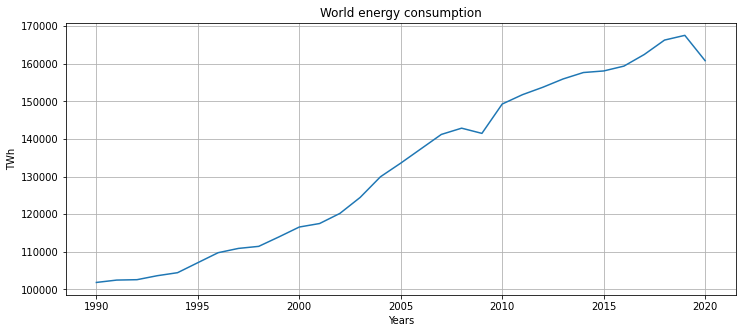

In [73]:
world_energy_consumption = df_Continent['World'].values
years = df_Continent_years['Year'].values

plt.figure(figsize=(12,5))
plt.plot(years,world_energy_consumption)
plt.xlabel('Years')
plt.ylabel('TWh')
plt.title('World energy consumption')
plt.grid(True)
plt.show()



Podemos ver claramente que el consumo energético en el mundo aumenta cada año. Pero notamos dos cambios abruptos cerca del 2008-2009 y 2020. Podríamos asociar estos cambios a:
- 2008-2009: Gran recesión o crisis económica iniciada en el 2008, pero que se evidenció en el 2009.
- 2019-2020: En Noviembre del 2019 se encontró el primer caso de Covid19 y en el 2020 se delcaró pandemia mundial.

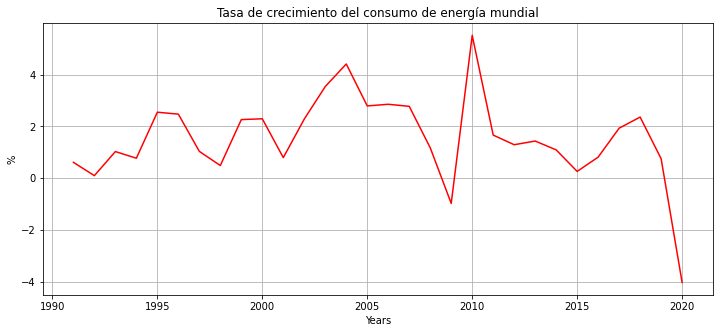

In [78]:
tasa_crecimiento = df_Continent['World'].pct_change().mul(100)

plt.figure(figsize=(12,5))
plt.plot(years,tasa_crecimiento, 'r')
plt.xlabel('Years')
plt.ylabel('%')
plt.title('Tasa de crecimiento del consumo de energía mundial')
plt.grid(True)
plt.show()

In [81]:
profile = ppr.ProfileReport(df_Continent, title='Pandas Profiling Report', minimal=True)

In [82]:
profile.to_file('../data/reports/Continent_Consumption_TWH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 500.22it/s]
